In [1]:
import tensorflow as tf
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Create fake data linear regression
np.random.seed(77)
tf.set_random_seed(77)

n_samples = 100
n_features = 1
n_output = 1
minval = -1
maxval = 1
dtype = 'float32'
slope = np.array([[3]], dtype=dtype) # n_features * n_output
intercept = np.array([[1]], dtype=dtype) # n_output
noises = np.random.normal(0, 0.2, size= [n_samples, n_output]) # n_samples * n_output
X = np.linspace(minval, maxval, n_samples * n_features, dtype= dtype).reshape([n_samples, n_features])
y = np.matmul(X, slope) + intercept + noises

# Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

In [3]:
# Hyperparamters
learning_rate = 0.01
epochs = 1000
display_step = 50

n_hidden_1 = 10

In [4]:
W = {
    'h1' : tf.Variable(tf.random_normal([n_features, n_hidden_1])),
    'output': tf.Variable(tf.random_normal([n_hidden_1, n_output]))
}

b = {
    'h1': tf.Variable(tf.random_normal([n_hidden_1])),
    'output': tf.Variable(tf.random_normal([n_output]))
}

In [5]:
def network(x, weights, biases):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['h1'])
    layer_1 = tf.nn.relu(layer_1)
    
    output = tf.add(tf.matmul(layer_1, weights['output']), biases['output'])
    return output

In [6]:
tf_X = tf.placeholder(tf.float32, shape=[None, n_features])
tf_y = tf.placeholder(tf.float32, shape=[None, n_output])

output = network(tf_X, W, b)
cost = tf.reduce_mean(tf.square(tf_y - output))
#cost = tf.losses.mean_squared_error(tf_f, output)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [7]:
session = tf.Session()
init = tf.global_variables_initializer()
session.run(init)

In [8]:
for epoch in range(epochs):
    train_feed = {tf_X: X_train, tf_y: y_train}
    _, _output, _cost = session.run([optimizer, output, cost], feed_dict=train_feed)
    
    if epoch % display_step ==0:
        
        print('Epoch : {}'.format(epoch), 'Cost : {}'.format(_cost), 
              'Cost: {}'.format(_cost), 
              'W: {}'.format(session.run(W['output'])), 
              'b : {}'.format(session.run(b['output'])))

Epoch : 0 Cost : 8.263123512268066 Cost: 8.263123512268066 W: [[ 0.36301824]
 [ 1.6418548 ]
 [-0.26681125]
 [-0.05362239]
 [-2.23505   ]
 [-1.6087079 ]
 [-0.9766936 ]
 [ 1.2637328 ]
 [-1.8622931 ]
 [ 0.6355958 ]] b : [1.0272164]
Epoch : 50 Cost : 0.1288454830646515 Cost: 0.1288454830646515 W: [[ 0.44318178]
 [ 1.3119136 ]
 [-0.35369417]
 [-0.05362239]
 [-2.216704  ]
 [-1.6598178 ]
 [-0.9594364 ]
 [ 1.2937964 ]
 [-2.2200875 ]
 [ 0.6355958 ]] b : [1.2359575]
Epoch : 100 Cost : 0.06517358869314194 Cost: 0.06517358869314194 W: [[ 0.4786056 ]
 [ 1.2980117 ]
 [-0.3596907 ]
 [-0.05362239]
 [-2.216704  ]
 [-1.6655992 ]
 [-0.95899165]
 [ 1.3496377 ]
 [-2.2407668 ]
 [ 0.6355958 ]] b : [1.2864611]
Epoch : 150 Cost : 0.05640333890914917 Cost: 0.05640333890914917 W: [[ 0.49854627]
 [ 1.2990249 ]
 [-0.36026204]
 [-0.05362239]
 [-2.216704  ]
 [-1.6650084 ]
 [-0.9589725 ]
 [ 1.3653705 ]
 [-2.2375991 ]
 [ 0.6355958 ]] b : [1.2996004]
Epoch : 200 Cost : 0.05137408897280693 Cost: 0.05137408897280693 W: [

In [9]:
session.run(W)

{'h1': array([[ 1.1255391 , -1.4637518 , -0.34576645, -0.22355072,  0.32922602,
         -0.81376296,  0.804923  ,  0.00616994, -1.4931227 ,  0.5919089 ]],
       dtype=float32), 'output': array([[ 0.5853131 ],
        [ 1.2334671 ],
        [-0.3673897 ],
        [-0.05362239],
        [-2.216704  ],
        [-1.6987718 ],
        [-0.9589725 ],
        [ 1.4072403 ],
        [-2.1592393 ],
        [ 0.6355958 ]], dtype=float32)}

In [10]:
session.run(b)

{'h1': array([-0.60525244,  0.07793238,  0.345777  , -0.28728136, -0.33097672,
         0.03176615, -0.80511326,  1.4124589 ,  1.0632292 , -1.6874728 ],
       dtype=float32), 'output': array([1.3317299], dtype=float32)}

In [11]:
session.run(cost, feed_dict=train_feed)

0.039818265

In [12]:
train_pred, train_cost = session.run([output, cost], feed_dict={tf_X : X_train, tf_y : y_train})
test_pred, test_cost = session.run([output, cost], feed_dict={tf_X : X_test, tf_y : y_test})

In [13]:
metrics.mean_squared_error(y_train, train_pred)

0.0398182657799656

In [14]:
print(metrics.r2_score(y_train, train_pred))
print(metrics.r2_score(y_test, test_pred))

0.9877064044123548
0.9782554341804289


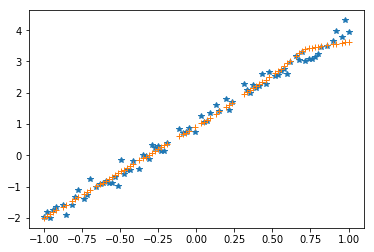

In [15]:
plt.plot(X_train, y_train, '*')
plt.plot(X_train, train_pred, '+')

In [17]:
np.concatenate([train_pred, y_train], axis=1)

array([[ 2.49161768e+00,  6.20815849e+00],
       [ 1.13415396e+00,  1.28630519e+00],
       [ 3.01839089e+00,  9.11068344e+00],
       [ 9.09098387e-01,  8.26459885e-01],
       [-6.33374214e-01,  4.01162893e-01],
       [ 2.08437872e+00,  4.34463453e+00],
       [ 3.26193666e+00,  1.06402311e+01],
       [ 3.18075490e+00,  1.01172018e+01],
       [-1.22663307e+00,  1.50462866e+00],
       [ 7.31120586e-01,  5.34537315e-01],
       [-4.01155949e-02,  1.60926091e-03],
       [ 2.56513834e-01,  6.57993481e-02],
       [ 2.01650524e+00,  4.06629324e+00],
       [ 2.62736416e+00,  6.90304232e+00],
       [-1.87921810e+00,  3.53146076e+00],
       [-3.96070957e-01,  1.56872198e-01],
       [ 3.47210193e+00,  1.20554914e+01],
       [ 2.28799820e+00,  5.23493576e+00],
       [-1.58258820e+00,  2.50458550e+00],
       [ 3.45605135e+00,  1.19442911e+01],
       [ 3.52025366e+00,  1.23921862e+01],
       [ 3.55235505e+00,  1.26192265e+01],
       [-1.46393633e+00,  2.14310956e+00],
       [ 2.

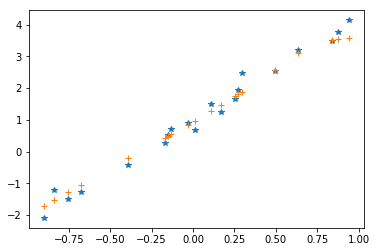

In [18]:
plt.plot(X_test, y_test, '*')
plt.plot(X_test, test_pred, '+')

In [20]:
metrics.mean_squared_error(y_test, test_pred)

0.06853580942277052

In [19]:
np.concatenate([y_test, test_pred], axis=1)

array([[-2.09191157, -1.70124006],
       [ 3.76095269,  3.53630447],
       [ 0.27843563,  0.43449152],
       [ 4.13625562,  3.58445621],
       [-1.28752606, -1.04865503],
       [ 0.51177788,  0.49381721],
       [ 3.20369121,  3.09957266],
       [ 3.48827924,  3.50420308],
       [ 0.6848622 ,  0.96842432],
       [ 1.23375925,  1.47351992],
       [ 1.49943888,  1.2699002 ],
       [ 1.6486175 ,  1.74501252],
       [ 2.52297856,  2.55949068],
       [ 2.46039768,  1.88075888],
       [-1.20147212, -1.5232625 ],
       [ 0.91308173,  0.84977269],
       [ 1.94176393,  1.81288588],
       [-1.48254633, -1.28595877],
       [-0.42621932, -0.21809316],
       [ 0.7174484 ,  0.55314326]])

In [ ]:
if 'session' in locals() and session is not None:
    print('Close interactive session')
    session.close()